# OSM24 Poster

In [5]:
import xarray as xr
import matplotlib.pyplot as plt
import matplotlib as mpl
from matplotlib.path import Path
import seaborn as sns
import seaborn
import pandas as pd
import numpy as np
from importlib import reload
import cartopy.crs as ccrs
import cmocean.cm as cmo
import gsw

import density_funcs as df
import EV_funcs as ef
import filt_funcs as ff
import plot_funcs as pf
import processing_funcs as prf

In [6]:
reload(prf)

<module 'processing_funcs' from '/home/amf2288/argo-intern/processing_funcs.py'>

In [7]:
font = {'family' : 'normal',
        'size'   : 24}

mpl.rc('font', **font)

In [12]:
atl = xr.open_dataset('/swot/SUM05/amf2288/sync-boxes/lon:(-25,-20)_lat:(-70,70)_ds_z.nc')
#atl = prf.get_MLD(atl)
pac = xr.open_dataset('/swot/SUM05/amf2288/sync-boxes/lon:(-180,-175)_lat:(-70,70)_ds_z.nc')
#pac = prf.get_MLD(pac)
watl = xr.open_dataset('/swot/SUM05/amf2288/sync-boxes/lon:(-60,-55)_lat:(10,45)_ds_z.nc')
#watl = prf.get_MLD(watl)
wpac = xr.open_dataset('/swot/SUM05/amf2288/sync-boxes/lon:(150,155)_lat:(-5,50)_ds_z.nc')
#wpac = prf.get_MLD(wpac)
wind = xr.open_dataset('/swot/SUM05/amf2288/sync-boxes/lon:(60,65)_lat:(-65,25)_ds_z.nc')
#wind = prf.get_MLD(wind)

In [16]:
watl = prf.get_MLD(watl)

In [18]:
wpac = prf.get_MLD(wpac)

In [20]:
wind = prf.get_MLD(wind)

### Motivation

In [21]:
glid_num = '659'
ds_z   = xr.open_dataset('/home/amf2288/argo-intern/SWIR_ACC_glider_tracer_analysis/data/sg_'+glid_num+'_4m_binned.nc')

In [22]:
ds_z['spice'] = gsw.spiciness0(ds_z.SA,ds_z.CT).rename('spice')

findfont: Font family ['normal'] not found. Falling back to DejaVu Sans.
findfont: Font family ['normal'] not found. Falling back to DejaVu Sans.


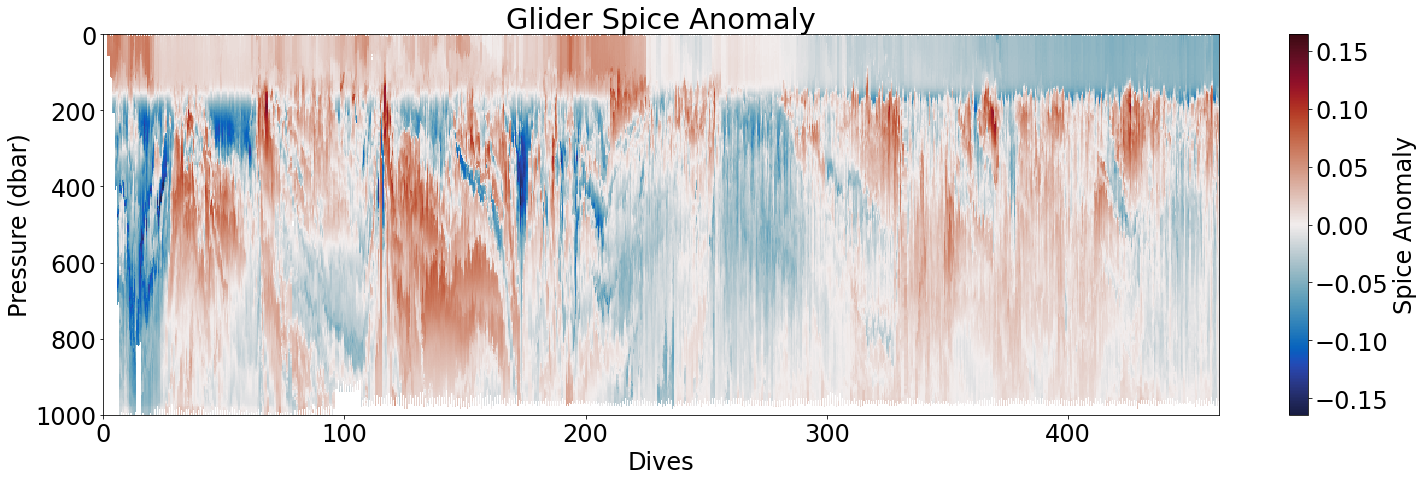

In [23]:
plt.figure(figsize=(25,7))
(ds_z.spice-ds_z.spice.mean('dives')).plot(y='ctd_pressure',cmap=cmo.balance,cbar_kwargs={'label': 'Spice Anomaly'})
plt.gca().invert_yaxis()
plt.ylabel('Pressure (dbar)')
plt.xlabel('Dives')
plt.xticks(np.arange(0,len(ds_z.dives)/2,100))
plt.title('Glider Spice Anomaly')
plt.savefig('/home.ufs/amf2288/argo-intern/fig_tests/motivation.png')

## Methods

In [24]:
lfilter = 75
lat_bins = np.arange(-70,70,5)
SPICE_anom_binned = watl.SPICE.groupby_bins('LATITUDE',lat_bins) - watl.SPICE.groupby_bins('LATITUDE',lat_bins).mean('N_PROF')
watl = watl.assign(SPICE_anom_binned=(['N_PROF','PRES_INTERPOLATED'],SPICE_anom_binned.data))
watl_SPICE_anom_binned_EKE = ef.get_EV(watl,lfilter,variable='SPICE_anom_binned')

In [25]:
watl_SPICE_anom_binned_TV = ef.get_total_variance(watl,lfilter,variable='SPICE_anom_binned')
watl_SPICE_anom_binned_MV = ef.get_MV(watl,lfilter,variable='SPICE_anom_binned')

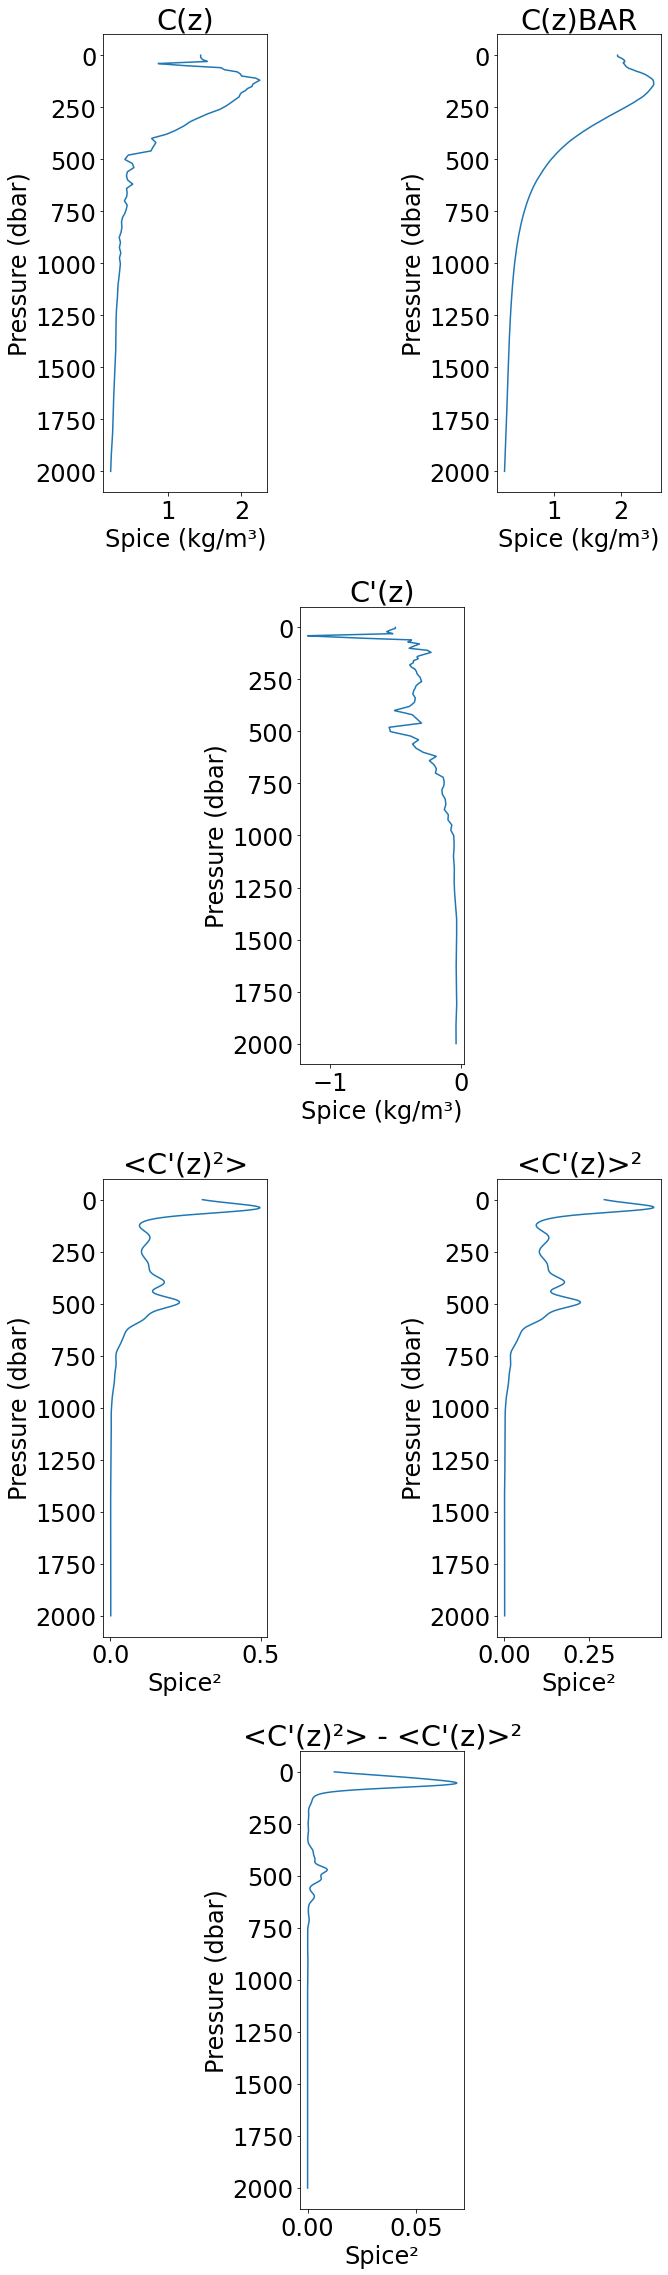

In [26]:
prof=27

plt.figure(figsize=(10,40))

plt.subplot(4,3,1)
watl.SPICE.isel(N_PROF=prof).plot(y='PRES_INTERPOLATED')
plt.gca().invert_yaxis()
plt.ylabel('Pressure (dbar)')
plt.xlabel('Spice (kg/m\u00B3)')
plt.title("C(z)")

plt.subplot(4,3,3)
watl.SPICE.groupby_bins('LATITUDE',lat_bins).mean('N_PROF').isel(LATITUDE_bins=22).plot(y='PRES_INTERPOLATED')
plt.gca().invert_yaxis()
plt.ylabel('Pressure (dbar)')
plt.xlabel('Spice (kg/m\u00B3)')
plt.title("C(z)BAR")

plt.subplot(4,3,5)
SPICE_anom_binned.isel(N_PROF=prof).plot(y='PRES_INTERPOLATED')
plt.gca().invert_yaxis()
plt.ylabel('Pressure (dbar)')
plt.xlabel('Spice (kg/m\u00B3)')
plt.title("C'(z)")

plt.subplot(4,3,7)
watl_SPICE_anom_binned_TV.isel(N_PROF=prof).plot(y='PRES_INTERPOLATED')
plt.gca().invert_yaxis()
plt.ylabel('Pressure (dbar)')
plt.xlabel('Spice\u00B2')
plt.title("<C'(z)\u00b2>")

plt.subplot(4,3,9)
watl_SPICE_anom_binned_MV.isel(N_PROF=prof).plot(y='PRES_INTERPOLATED')
plt.gca().invert_yaxis()
plt.ylabel('Pressure (dbar)')
plt.xlabel('Spice\u00B2')
plt.title("<C'(z)>\u00b2")

plt.subplot(4,3,11)
watl_SPICE_anom_binned_EKE.isel(N_PROF=prof).plot(y='PRES_INTERPOLATED')
plt.gca().invert_yaxis()
plt.ylabel('Pressure (dbar)')
plt.xlabel('Spice\u00b2')
plt.title("<C'(z)\u00b2> - <C'(z)>\u00b2")

plt.subplots_adjust(hspace=0.25)
plt.savefig('/home.ufs/amf2288/argo-intern/fig_tests/methods.png')

## Results

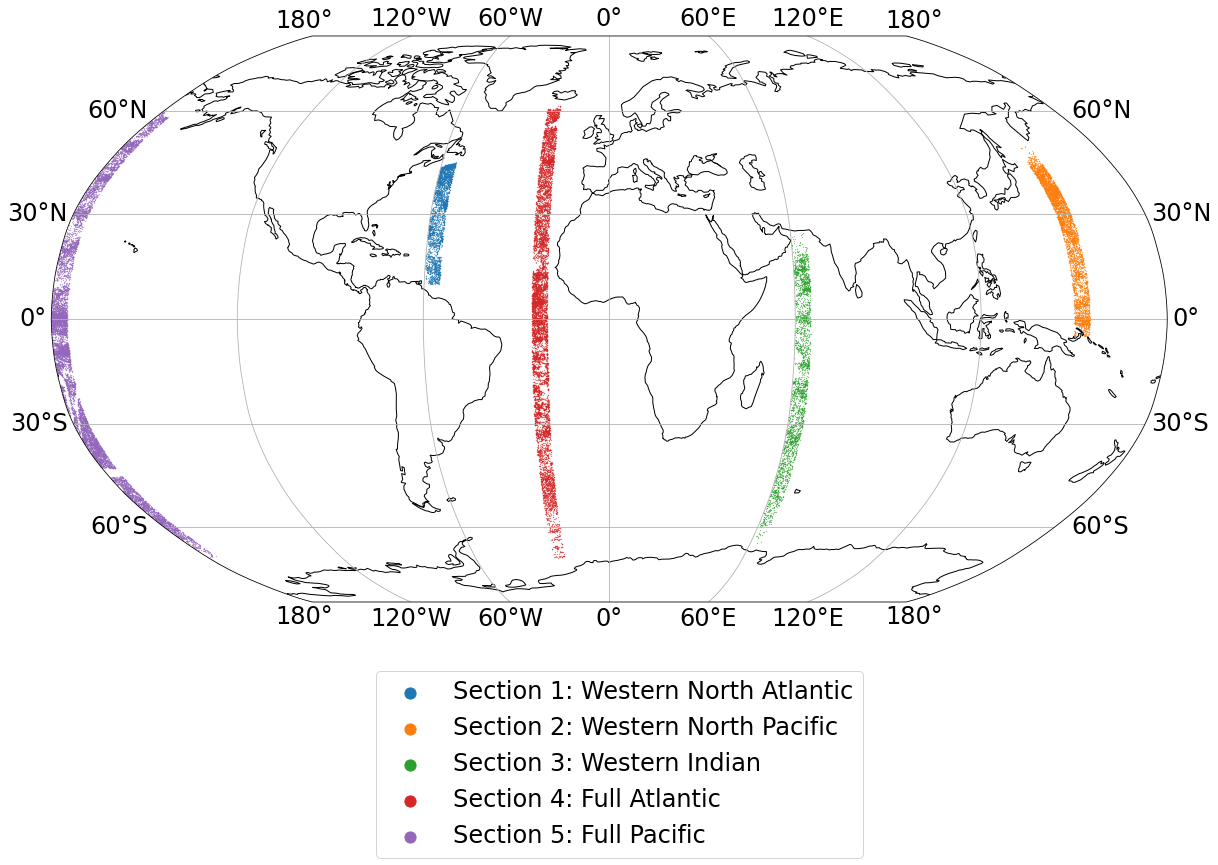

In [27]:
fig = plt.figure(figsize=(20, 20))
ax = plt.axes(projection=ccrs.Robinson())
ax.coastlines()
ax.set_global()
ax.gridlines(draw_labels=True)
#for n in range(0,len(boxes)):
#    ax.plot(posttobox(boxes[n][:2],boxes[n][2:])[0],postobox(boxes[n][:2],boxes[n][2:][1], #color=colors[n],transform=ccrs.PlateCCarree(),lw=2)

ax.scatter(watl.LONGITUDE,watl.LATITUDE,transform=ccrs.PlateCarree(),color='tab:blue',label='Section 1: Western North Atlantic',s=0.05)
ax.scatter(wpac.LONGITUDE,wpac.LATITUDE,transform=ccrs.PlateCarree(),color='tab:orange',label='Section 2: Western North Pacific',s=0.05)
ax.scatter(wind.LONGITUDE,wind.LATITUDE,transform=ccrs.PlateCarree(),color='tab:green',label='Section 3: Western Indian',s=0.05)
ax.scatter(atl.LONGITUDE, atl.LATITUDE, transform=ccrs.PlateCarree(),color='tab:red',label='Section 4: Full Atlantic',s=0.05)
ax.scatter(pac.LONGITUDE, pac.LATITUDE, transform=ccrs.PlateCarree(),color='tab:purple',label='Section 5: Full Pacific',s=0.05)


plt.legend(bbox_to_anchor=(0.738,-0.1),markerscale=50)
plt.savefig('/home.ufs/amf2288/argo-intern/fig_tests/map.png')

#### Colorbars

In [59]:
import matplotlib.colors as colors
import cmocean
cmap = cmocean.tools.crop_by_percent(cmo.balance, 10, which='both', N=10)
norm = colors.BoundaryNorm(boundaries=np.linspace(-15, -5, 10+1), ncolors=10)

### Atlantic Western Boundary

In [101]:
box_watl = [-60,-55,10,45,0,2001]

In [102]:
lfilter = 75
lat_bins = np.arange(-70,70,2)
SPICE_anom_binned = watl.SPICE.groupby_bins('LATITUDE',lat_bins) - watl.SPICE.groupby_bins('LATITUDE',lat_bins).mean('N_PROF')
SIG0_binned = watl.SIG0.groupby_bins('LATITUDE',lat_bins).mean('N_PROF')
watl = watl.assign(SPICE_anom_binned=(['N_PROF','PRES_INTERPOLATED'],SPICE_anom_binned.data))
watl_SPICE_anom_binned_EKE = ef.get_EV(watl,lfilter,variable='SPICE_anom_binned')

In [103]:
print(watl.SIG0.min().values,watl.SIG0.max().values)

17.501254662576912 27.88255734319887


In [104]:
levels = [26.3,27,27.6,27.75]

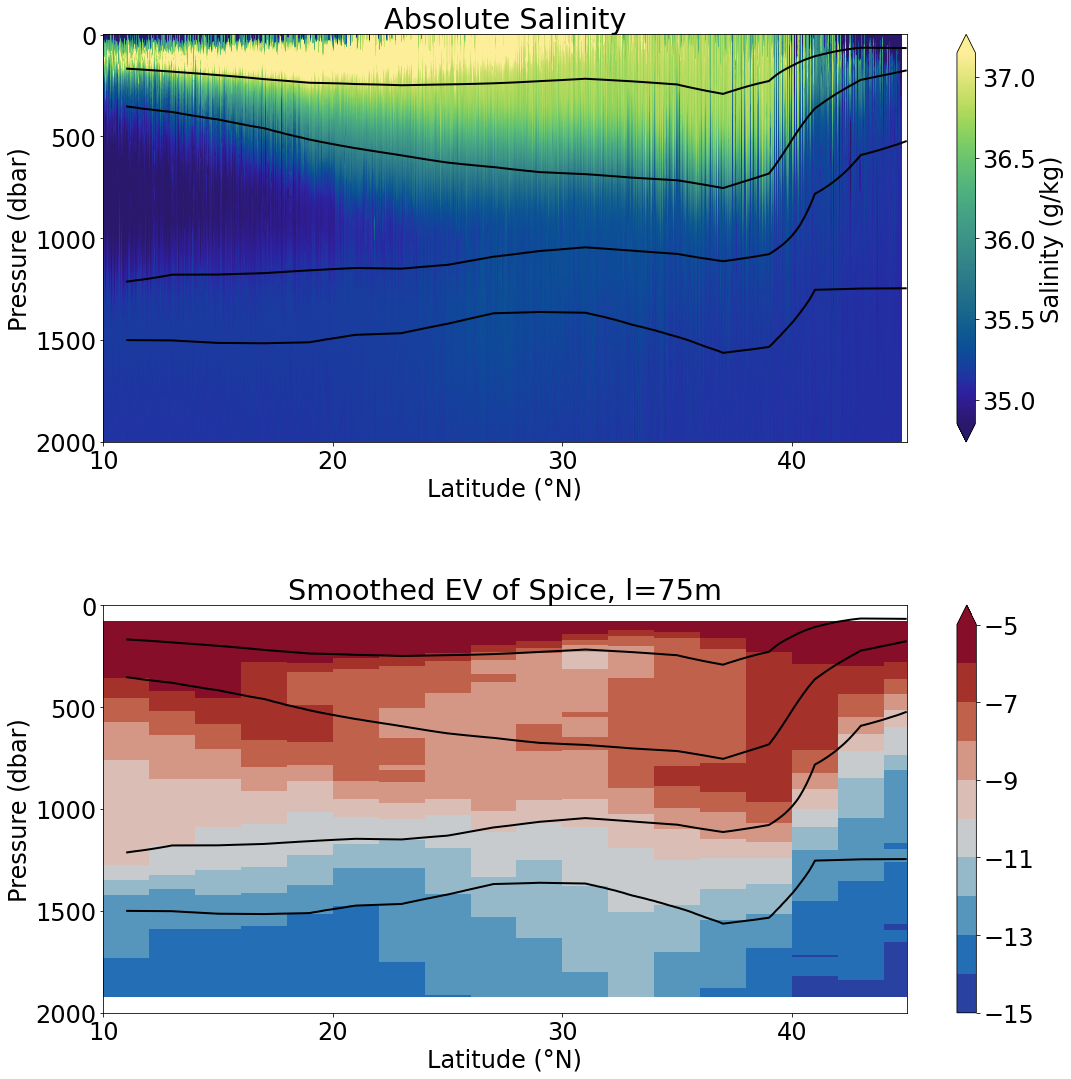

In [106]:
x='LATITUDE'
plt.figure(figsize=(18,18))

plt.subplot(211)
watl.SA.sortby(x).plot(x=x,y='PRES_INTERPOLATED',robust=True,cmap=cmo.haline,cbar_kwargs={'label': 'Salinity (g/kg)'})
SIG0_binned.plot.contour(x='LATITUDE_bins', y='PRES_INTERPOLATED', levels=levels, colors='k', linewidths=2)
plt.gca().invert_yaxis()
plt.xlim([10,45])
plt.xticks(np.arange(10,45,10))
plt.ylabel('Pressure (dbar)')
plt.xlabel('Latitude (°N)')
plt.title('Absolute Salinity')

'''plt.subplot(312)
np.log(watl_SPICE_anom_binned_EKE.where(watl_SPICE_anom_binned_EKE.mask==1)).sortby(x).plot(x=x, y='PRES_INTERPOLATED',cmap=cmo.balance,vmin=-15,vmax=-5)
watl.SIG0.sortby(x).plot.contour(x='LATITUDE', y='PRES_INTERPOLATED', levels=levels, colors='k', linewidths=0.2)
plt.gca().invert_yaxis()
plt.xlim([10,45])
plt.xticks(np.arange(10,45,10))
plt.ylabel('Pressure (dbar)')
plt.xlabel('Latitude (°N)')
plt.title('EV of Spice, l={}m'.format(lfilter))'''

plt.subplot(212)
np.log(watl_SPICE_anom_binned_EKE.where(watl_SPICE_anom_binned_EKE.mask==1)).groupby_bins('LATITUDE',lat_bins).mean('N_PROF').plot(y='PRES_INTERPOLATED',cmap=cmap,norm=norm)
SIG0_binned.plot.contour(x='LATITUDE_bins', y='PRES_INTERPOLATED', levels=levels, colors='k', linewidths=2)
plt.gca().invert_yaxis()
plt.xlim([10,45])
plt.xticks(np.arange(10,45,10))
plt.ylabel('Pressure (dbar)')
plt.xlabel('Latitude (°N)')
plt.title('Smoothed EV of Spice, l={}m'.format(lfilter))

plt.subplots_adjust(hspace=0.4)
plt.savefig('/home.ufs/amf2288/argo-intern/fig_tests/watl.png')

### Pacific Western Boundary

In [107]:
box_wpac = [150,155,-5,50,0,2001]

In [108]:
lfilter = 75
lat_bins = np.arange(-70,70,2)
SPICE_anom_binned = wpac.SPICE.groupby_bins('LATITUDE',lat_bins) - wpac.SPICE.groupby_bins('LATITUDE',lat_bins).mean('N_PROF')
SIG0_binned = wpac.SIG0.groupby_bins('LATITUDE',lat_bins).mean('N_PROF')
wpac = wpac.assign(SPICE_anom_binned=(['N_PROF','PRES_INTERPOLATED'],SPICE_anom_binned.data))
wpac_SPICE_anom_binned_EKE = ef.get_EV(wpac,lfilter,variable='SPICE_anom_binned')

In [109]:
print(wpac.SIG0.min().values,wpac.SIG0.max().values)

20.12868687657749 27.760821894663668


In [110]:
levels = [25.5,27,27.45,27.6]

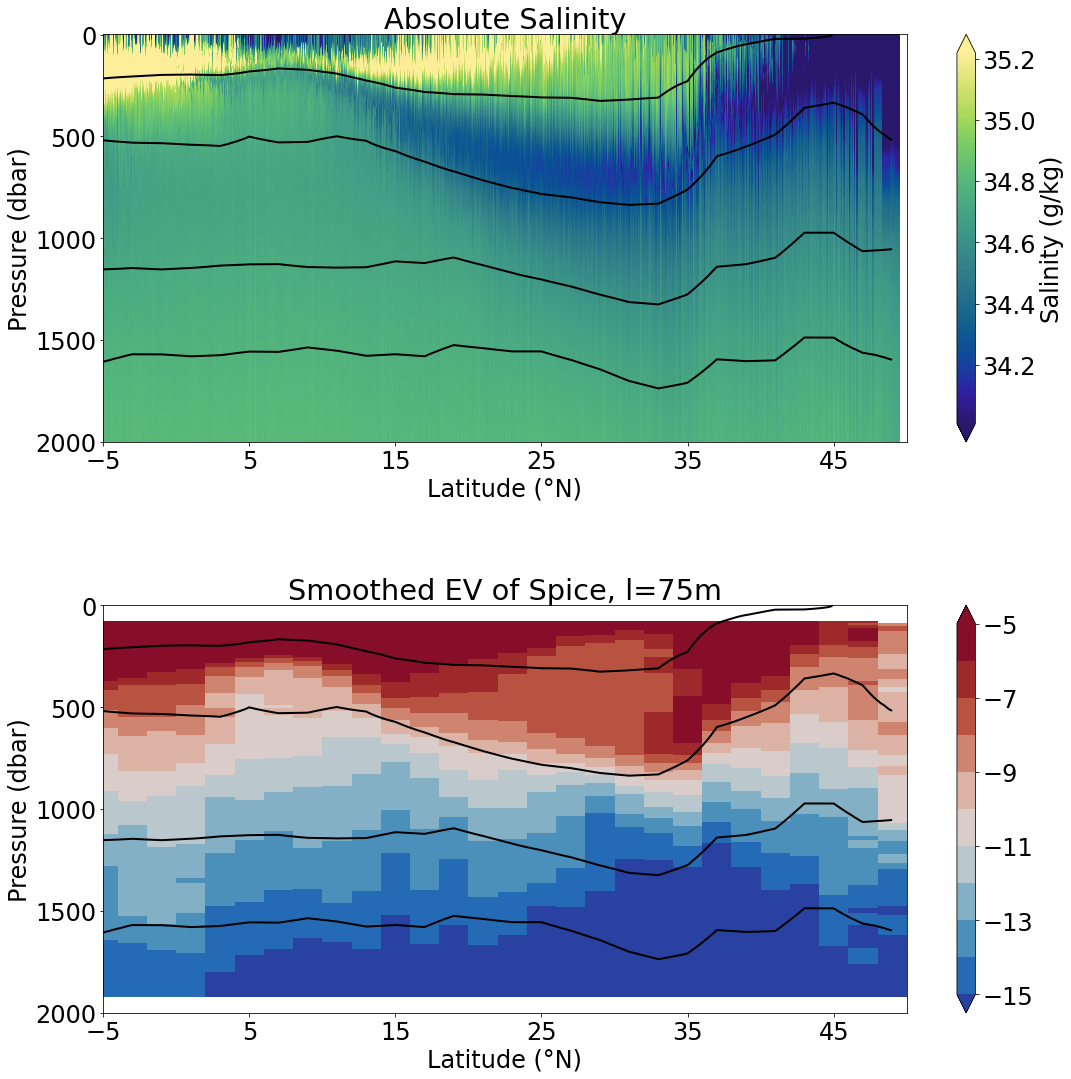

In [111]:
plt.figure(figsize=(18,18))

plt.subplot(211)
wpac.SA.sortby(x).plot(x=x,y='PRES_INTERPOLATED',robust=True,cmap=cmo.haline,cbar_kwargs={'label': 'Salinity (g/kg)'})
SIG0_binned.plot.contour(x='LATITUDE_bins', y='PRES_INTERPOLATED', levels=levels, colors='k', linewidths=2)
plt.gca().invert_yaxis()
plt.xlim([-5,50])
plt.xticks(np.arange(-5,50,10))
plt.ylabel('Pressure (dbar)')
plt.xlabel('Latitude (°N)')
plt.title('Absolute Salinity')

'''plt.subplot(312)
np.log(watl_SPICE_anom_binned_EKE.where(watl_SPICE_anom_binned_EKE.mask==1)).sortby(x).plot(x=x, y='PRES_INTERPOLATED',cmap=cmo.balance,vmin=-15,vmax=-5)
watl.SIG0.sortby(x).plot.contour(x='LATITUDE', y='PRES_INTERPOLATED', levels=levels, colors='k', linewidths=0.2)
plt.gca().invert_yaxis()
plt.xlim([-5,50])
plt.xticks(np.arange(-5,50,10))
plt.ylabel('Pressure (dbar)')
plt.xlabel('Latitude (°N)')
plt.title('EV of Spice, l={}m'.format(lfilter))'''

plt.subplot(212)
np.log(wpac_SPICE_anom_binned_EKE.where(wpac_SPICE_anom_binned_EKE.mask==1)).groupby_bins('LATITUDE',lat_bins).mean('N_PROF').plot(y='PRES_INTERPOLATED',cmap=cmap,norm=norm)
SIG0_binned.plot.contour(x='LATITUDE_bins', y='PRES_INTERPOLATED', levels=levels, colors='k', linewidths=2)
plt.gca().invert_yaxis()
plt.xlim([-5,50])
plt.xticks(np.arange(-5,50,10))
plt.ylabel('Pressure (dbar)')
plt.xlabel('Latitude (°N)')
plt.title('Smoothed EV of Spice, l={}m'.format(lfilter))

plt.subplots_adjust(hspace=0.4)
plt.savefig('/home.ufs/amf2288/argo-intern/fig_tests/wpac.png')

### Indian Western Boundary

In [150]:
box_wind = [60,65,-65,25,0,2001]

In [151]:
lfilter1 = 25
lfilter3 = 200

lat_bins = np.arange(-70,70,2)
SPICE_anom_binned = wind.SPICE.groupby_bins('LATITUDE',lat_bins) - wind.SPICE.groupby_bins('LATITUDE',lat_bins).mean('N_PROF')
SIG0_binned = wind.SIG0.groupby_bins('LATITUDE',lat_bins).mean('N_PROF')
wind = wind.assign(SPICE_anom_binned=(['N_PROF','PRES_INTERPOLATED'],SPICE_anom_binned.data))
wind_SPICE_anom_binned_EKE1 = ef.get_EV(wind,lfilter1,variable='SPICE_anom_binned')
wind_SPICE_anom_binned_EKE2 = ef.get_EV(wind,lfilter,variable='SPICE_anom_binned')
wind_SPICE_anom_binned_EKE3 = ef.get_EV(wind,lfilter3,variable='SPICE_anom_binned')

In [152]:
print(wind.SIG0.min().values,wind.SIG0.max().values)

17.394470297855946 29.779623746630254


In [153]:
levels = [26.5,27,27.4,27.7]

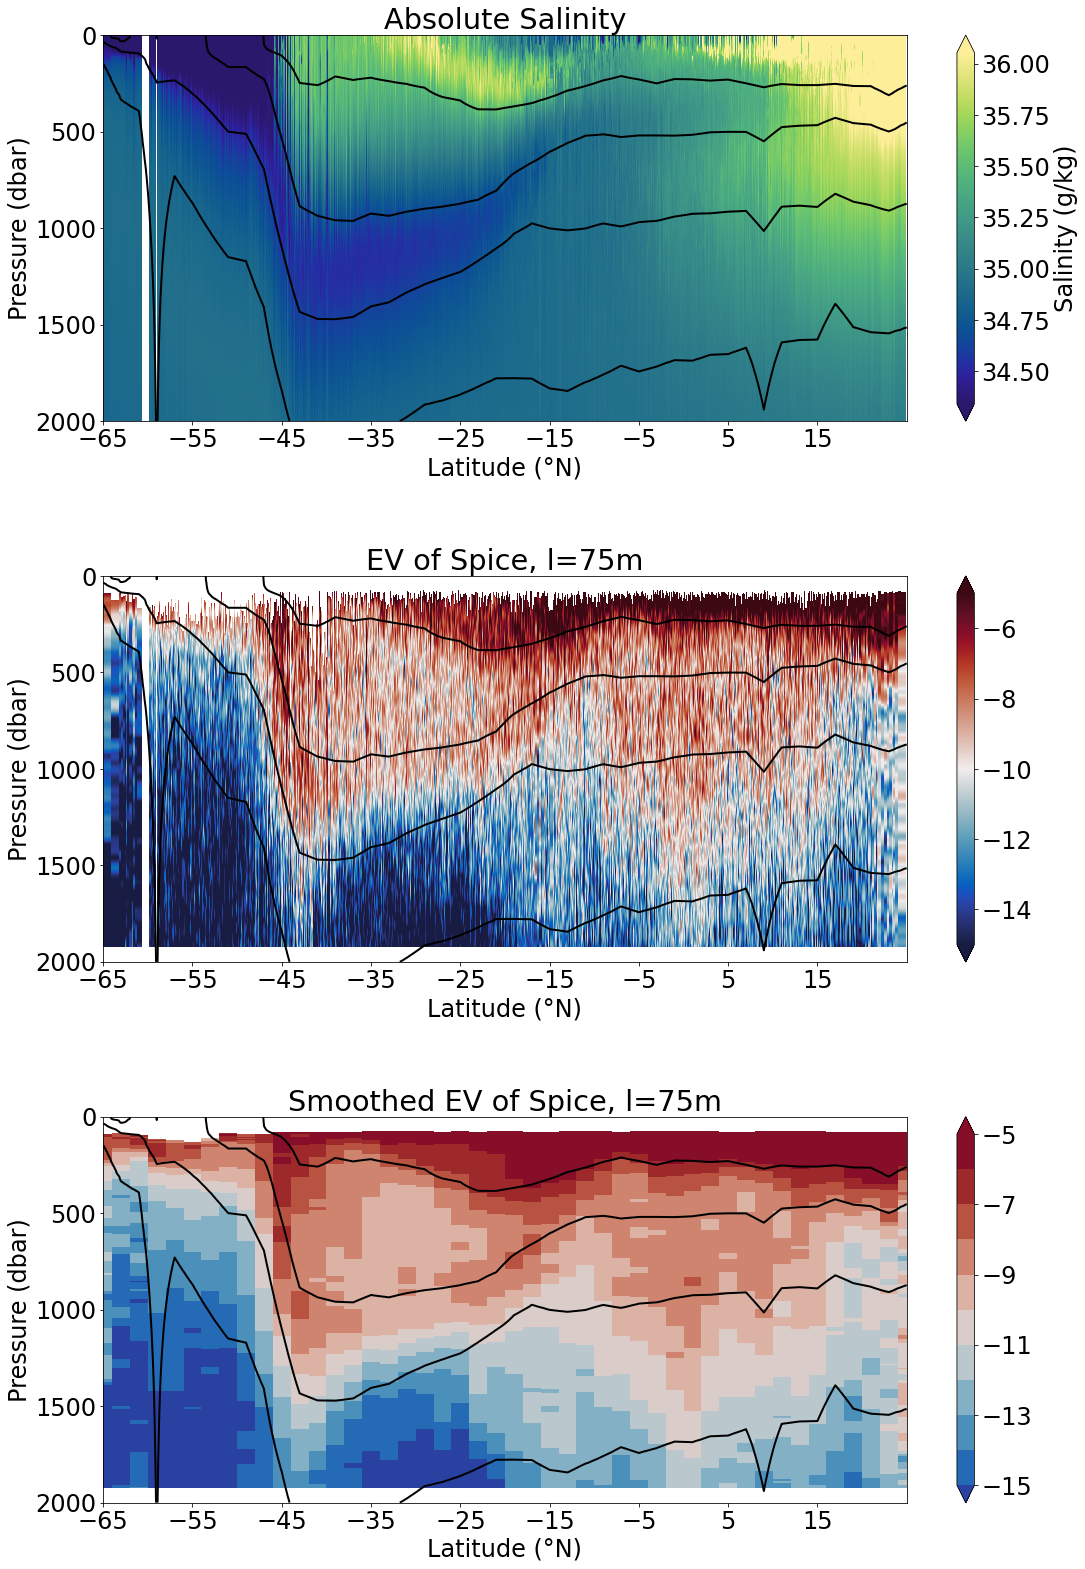

In [143]:
plt.figure(figsize=(18,27))

plt.subplot(311)
wind.SA.sortby(x).plot(x=x,y='PRES_INTERPOLATED',robust=True,cmap=cmo.haline,cbar_kwargs={'label': 'Salinity (g/kg)'})
SIG0_binned.plot.contour(x='LATITUDE_bins', y='PRES_INTERPOLATED', levels=levels, colors='k', linewidths=2)
plt.gca().invert_yaxis()
plt.xlim([-65,25])
plt.xticks(np.arange(-65,25,10))
plt.ylabel('Pressure (dbar)')
plt.xlabel('Latitude (°N)')
plt.title('Absolute Salinity')

plt.subplot(312)
np.log(wind_SPICE_anom_binned_EKE.where(wind_SPICE_anom_binned_EKE2.mask==1)).sortby(x).plot(x=x, y='PRES_INTERPOLATED',cmap=cmo.balance,vmin=-15,vmax=-5)
SIG0_binned.plot.contour(x='LATITUDE_bins', y='PRES_INTERPOLATED', levels=levels, colors='k', linewidths=2)
plt.gca().invert_yaxis()
plt.xlim([-65,25])
plt.xticks(np.arange(-65,25,10))
plt.ylabel('Pressure (dbar)')
plt.xlabel('Latitude (°N)')
plt.title('EV of Spice, l={}m'.format(lfilter))

plt.subplot(313)
np.log(wind_SPICE_anom_binned_EKE.where(wind_SPICE_anom_binned_EKE2.mask==1)).groupby_bins('LATITUDE',lat_bins).mean('N_PROF').plot(y='PRES_INTERPOLATED',cmap=cmap,norm=norm)
SIG0_binned.plot.contour(x='LATITUDE_bins', y='PRES_INTERPOLATED', levels=levels, colors='k', linewidths=2)
plt.gca().invert_yaxis()
plt.xlim([-65,25])
plt.xticks(np.arange(-65,25,10))
plt.ylabel('Pressure (dbar)')
plt.xlabel('Latitude (°N)')
plt.title('Smoothed EV of Spice, l={}m'.format(lfilter))

plt.subplots_adjust(hspace=0.4)
plt.savefig('/home.ufs/amf2288/argo-intern/fig_tests/wind.png')

### Atlantic Full Section

In [117]:
box_atl = [-25,-20,-70,70,0,2001]

In [119]:
lfilter = 75
lat_bins = np.arange(-70,70,2)
SPICE_anom_binned = atl.SPICE.groupby_bins('LATITUDE',lat_bins) - atl.SPICE.groupby_bins('LATITUDE',lat_bins).mean('N_PROF')
SIG0_binned = atl.SIG0.groupby_bins('LATITUDE',lat_bins).mean('N_PROF')
atl = atl.assign(SPICE_anom_binned=(['N_PROF','PRES_INTERPOLATED'],SPICE_anom_binned.data))
atl_SPICE_anom_binned_EKE = ef.get_EV(atl,lfilter,variable='SPICE_anom_binned')

In [120]:
print(atl.SIG0.min().values,atl.SIG0.max().values)

21.12826481587217 27.914478646952148


In [121]:
levels = [26,27,27.4,27.7]

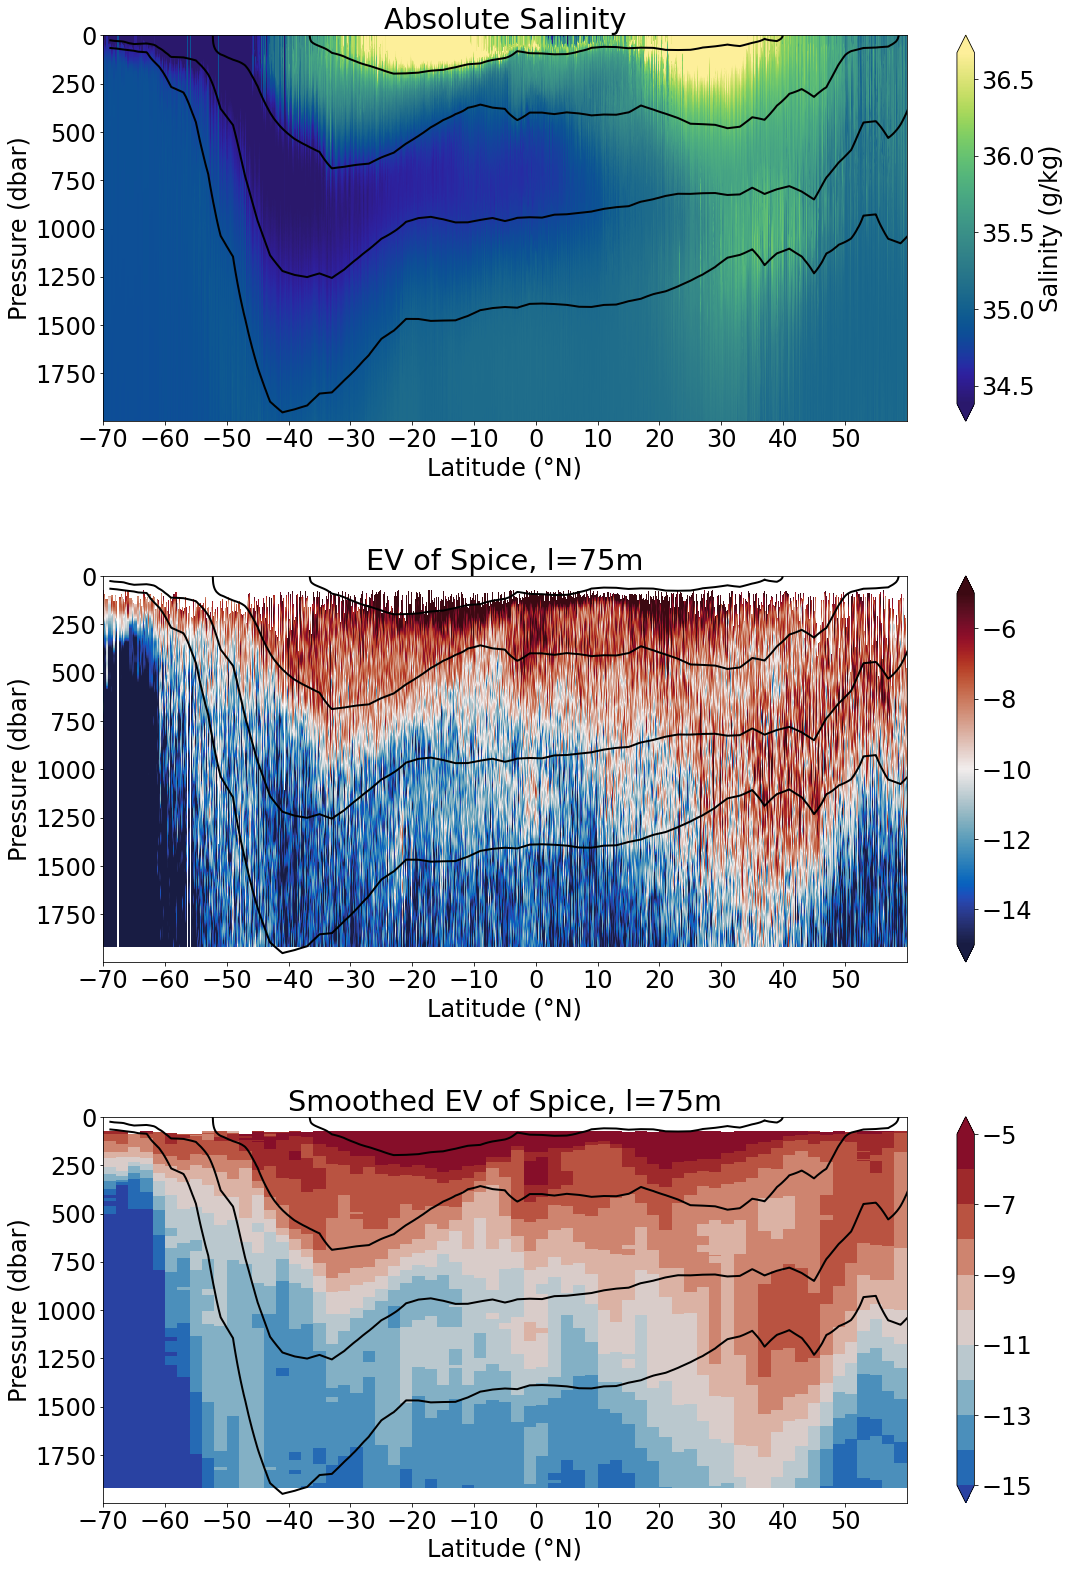

In [122]:
plt.figure(figsize=(18,27))

plt.subplot(311)
atl.SA.sortby(x).plot(x=x,y='PRES_INTERPOLATED',robust=True,cmap=cmo.haline,cbar_kwargs={'label': 'Salinity (g/kg)'})
SIG0_binned.plot.contour(x='LATITUDE_bins', y='PRES_INTERPOLATED', levels=levels, colors='k', linewidths=2)
plt.gca().invert_yaxis()
plt.xlim([-70,60])
plt.xticks(np.arange(-70,60,10))
plt.ylabel('Pressure (dbar)')
plt.xlabel('Latitude (°N)')
plt.title('Absolute Salinity')

plt.subplot(312)
np.log(atl_SPICE_anom_binned_EKE.where(atl_SPICE_anom_binned_EKE.mask==1)).sortby(x).plot(x=x, y='PRES_INTERPOLATED',cmap=cmo.balance,vmin=-15,vmax=-5)
SIG0_binned.plot.contour(x='LATITUDE_bins', y='PRES_INTERPOLATED', levels=levels, colors='k', linewidths=2)
plt.gca().invert_yaxis()
plt.xlim([-70,60])
plt.xticks(np.arange(-70,60,10))
plt.ylabel('Pressure (dbar)')
plt.xlabel('Latitude (°N)')
plt.title('EV of Spice, l={}m'.format(lfilter))

plt.subplot(313)
np.log(atl_SPICE_anom_binned_EKE.where(atl_SPICE_anom_binned_EKE.mask==1)).groupby_bins('LATITUDE',lat_bins).mean('N_PROF').plot(y='PRES_INTERPOLATED',cmap=cmap,norm=norm)
SIG0_binned.plot.contour(x='LATITUDE_bins', y='PRES_INTERPOLATED', levels=levels, colors='k', linewidths=2)
plt.gca().invert_yaxis()
plt.xlim([-70,60])
plt.xticks(np.arange(-70,60,10))
plt.ylabel('Pressure (dbar)')
plt.xlabel('Latitude (°N)')
plt.title('Smoothed EV of Spice, l={}m'.format(lfilter))

plt.subplots_adjust(hspace=0.4)
plt.savefig('/home.ufs/amf2288/argo-intern/fig_tests/atl.png')

### Pacific Full Section

In [123]:
box_pac = [-180,-175,-70,70,0,2001]

In [124]:
lfilter = 75
lat_bins = np.arange(-70,70,2)
SPICE_anom_binned = pac.SPICE.groupby_bins('LATITUDE',lat_bins) - pac.SPICE.groupby_bins('LATITUDE',lat_bins).mean('N_PROF')
SIG0_binned = pac.SIG0.groupby_bins('LATITUDE',lat_bins).mean('N_PROF')
pac = pac.assign(SPICE_anom_binned=(['N_PROF','PRES_INTERPOLATED'],SPICE_anom_binned.data))
pac_SPICE_anom_binned_EKE = ef.get_EV(pac,lfilter,variable='SPICE_anom_binned')

In [125]:
print(pac.SIG0.min().values,pac.SIG0.max().values)

20.383300349494675 27.851307946284578


In [126]:
levels = [26,27,27.4,27.6]

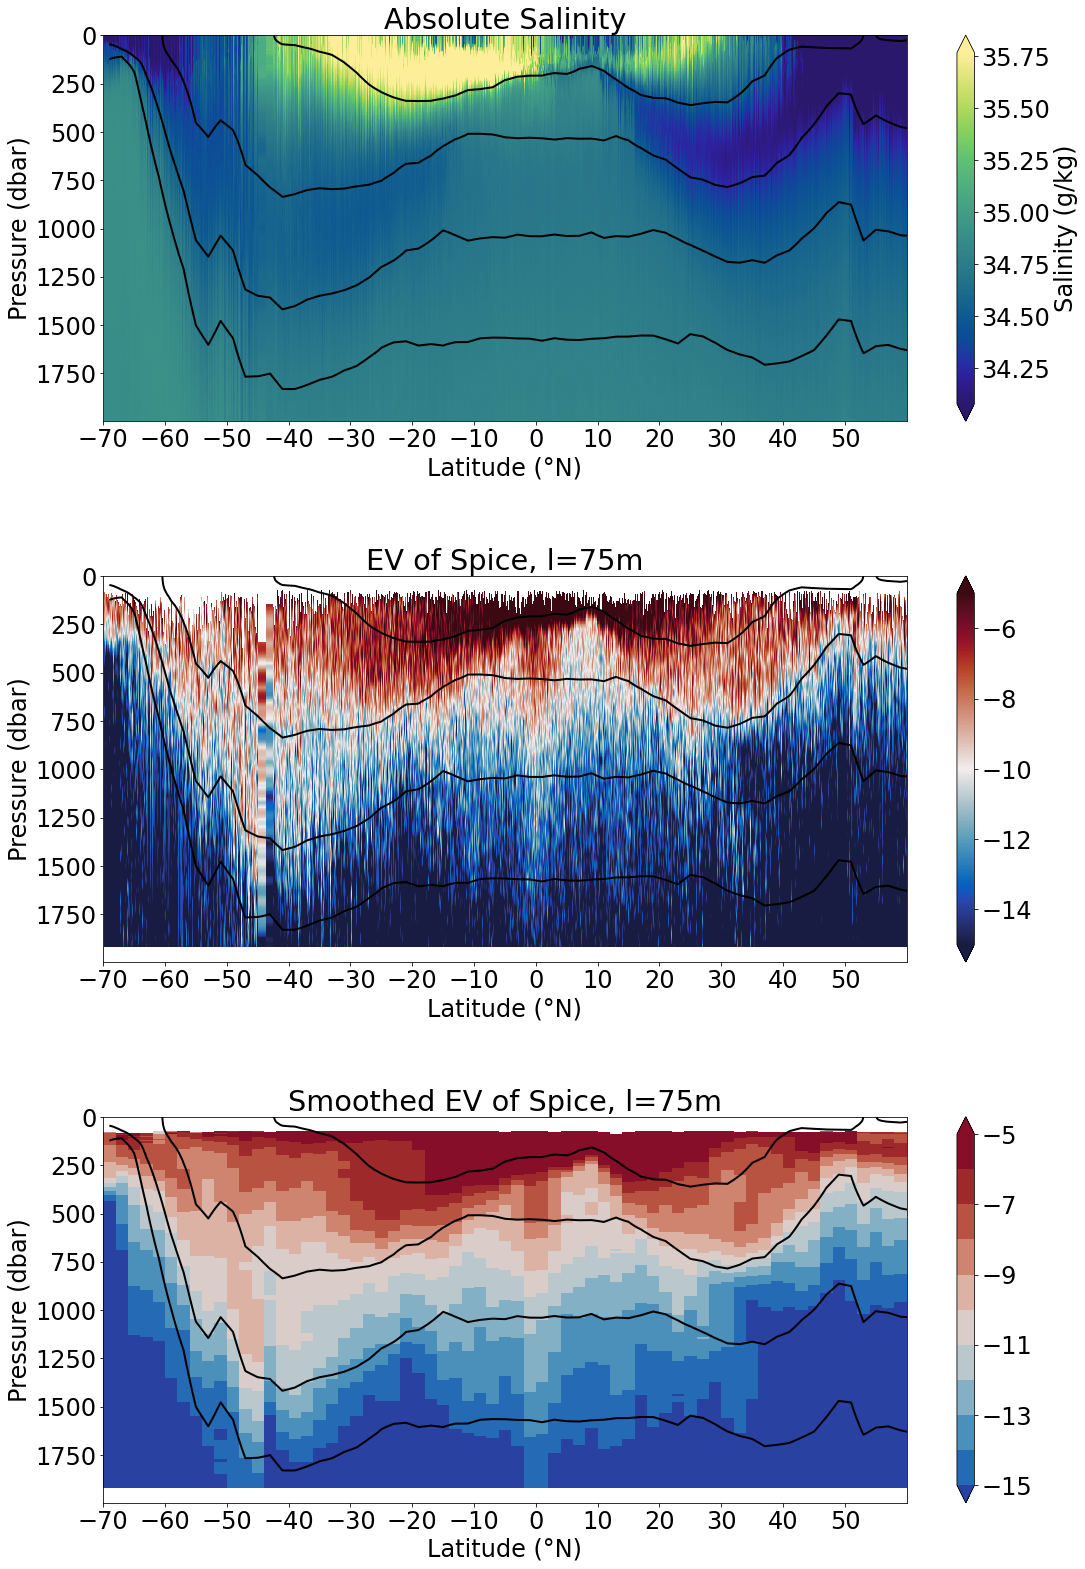

In [127]:
plt.figure(figsize=(18,27))

plt.subplot(311)
pac.SA.sortby(x).plot(x=x,y='PRES_INTERPOLATED',robust=True,cmap=cmo.haline,cbar_kwargs={'label': 'Salinity (g/kg)'})
SIG0_binned.plot.contour(x='LATITUDE_bins', y='PRES_INTERPOLATED', levels=levels, colors='k', linewidths=2)
plt.gca().invert_yaxis()
plt.xlim([-70,60])
plt.xticks(np.arange(-70,60,10))
plt.ylabel('Pressure (dbar)')
plt.xlabel('Latitude (°N)')
plt.title('Absolute Salinity')

plt.subplot(312)
np.log(pac_SPICE_anom_binned_EKE.where(pac_SPICE_anom_binned_EKE.mask==1)).sortby(x).plot(x=x, y='PRES_INTERPOLATED',cmap=cmo.balance,vmin=-15,vmax=-5)
SIG0_binned.plot.contour(x='LATITUDE_bins', y='PRES_INTERPOLATED', levels=levels, colors='k', linewidths=2)
plt.gca().invert_yaxis()
plt.xlim([-70,60])
plt.xticks(np.arange(-70,60,10))
plt.ylabel('Pressure (dbar)')
plt.xlabel('Latitude (°N)')
plt.title('EV of Spice, l={}m'.format(lfilter))

plt.subplot(313)
np.log(pac_SPICE_anom_binned_EKE.where(pac_SPICE_anom_binned_EKE.mask==1)).groupby_bins('LATITUDE',lat_bins).mean('N_PROF').plot(y='PRES_INTERPOLATED',cmap=cmap,norm=norm)
SIG0_binned.plot.contour(x='LATITUDE_bins', y='PRES_INTERPOLATED', levels=levels, colors='k', linewidths=2)
plt.gca().invert_yaxis()
plt.xlim([-70,60])
plt.xticks(np.arange(-70,60,10))
plt.ylabel('Pressure (dbar)')
plt.xlabel('Latitude (°N)')
plt.title('Smoothed EV of Spice, l={}m'.format(lfilter))

plt.subplots_adjust(hspace=0.4)
plt.savefig('/home.ufs/amf2288/argo-intern/fig_tests/pac.png')

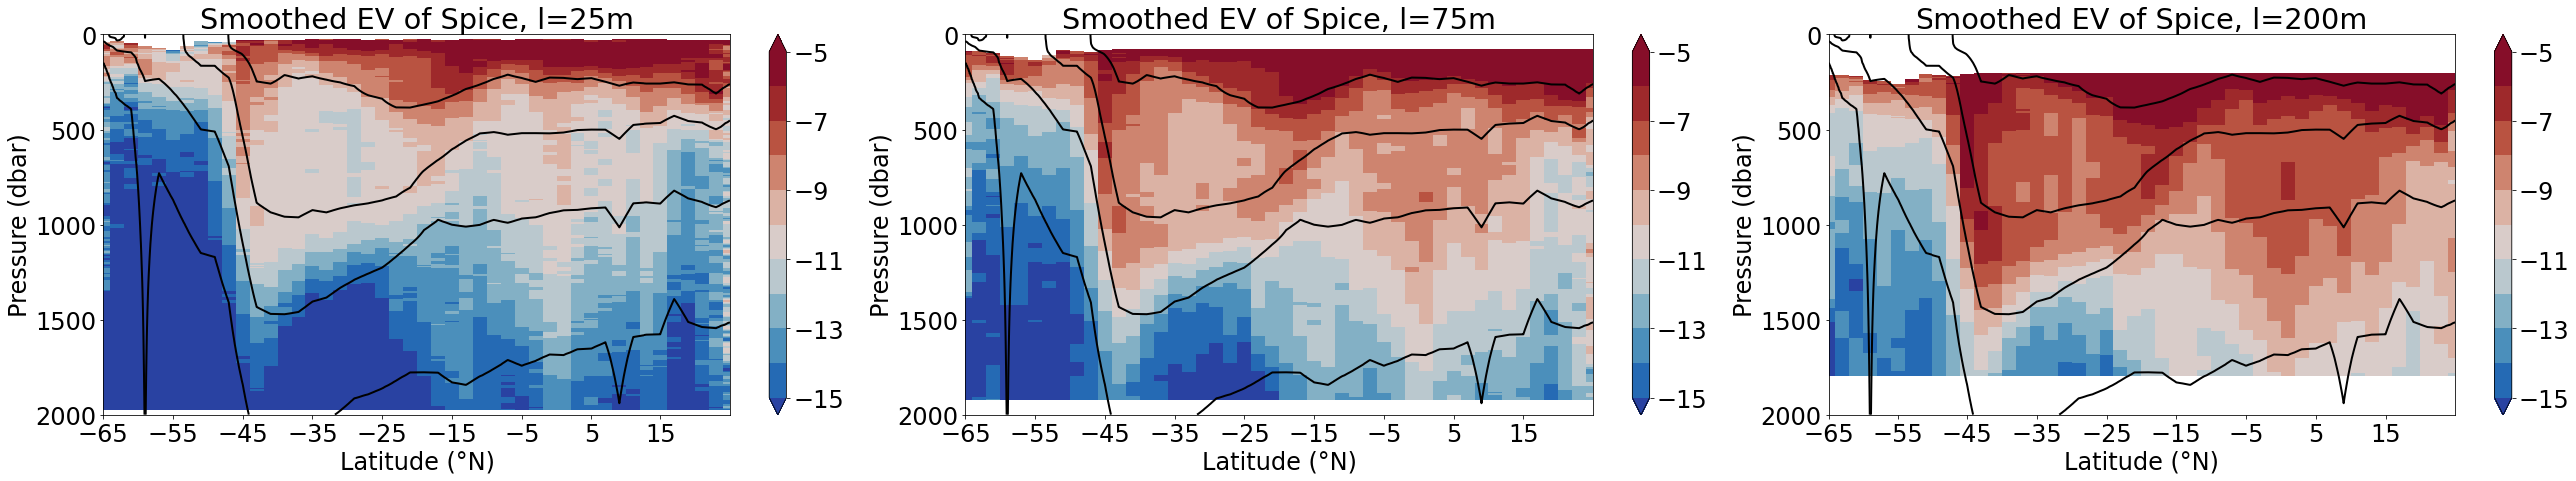

In [162]:
plt.figure(figsize=(45,7))

plt.subplot(131)
np.log(wind_SPICE_anom_binned_EKE1.where(wind_SPICE_anom_binned_EKE1.mask==1)).groupby_bins('LATITUDE',lat_bins).mean('N_PROF').plot(y='PRES_INTERPOLATED',cmap=cmap,norm=norm)
SIG0_binned.plot.contour(x='LATITUDE_bins', y='PRES_INTERPOLATED', levels=levels, colors='k', linewidths=2)
plt.gca().invert_yaxis()
plt.xlim([-65,25])
plt.xticks(np.arange(-65,25,10))
plt.ylabel('Pressure (dbar)')
plt.xlabel('Latitude (°N)')
plt.title('Smoothed EV of Spice, l={}m'.format(lfilter1))

plt.subplot(132)
np.log(wind_SPICE_anom_binned_EKE2.where(wind_SPICE_anom_binned_EKE2.mask==1)).groupby_bins('LATITUDE',lat_bins).mean('N_PROF').plot(y='PRES_INTERPOLATED',cmap=cmap,norm=norm)
SIG0_binned.plot.contour(x='LATITUDE_bins', y='PRES_INTERPOLATED', levels=levels, colors='k', linewidths=2)
plt.gca().invert_yaxis()
plt.xlim([-65,25])
plt.xticks(np.arange(-65,25,10))
plt.ylabel('Pressure (dbar)')
plt.xlabel('Latitude (°N)')
plt.title('Smoothed EV of Spice, l={}m'.format(lfilter))

plt.subplot(133)
np.log(wind_SPICE_anom_binned_EKE3.where(wind_SPICE_anom_binned_EKE3.mask==1)).groupby_bins('LATITUDE',lat_bins).mean('N_PROF').plot(y='PRES_INTERPOLATED',cmap=cmap,norm=norm)
SIG0_binned.plot.contour(x='LATITUDE_bins', y='PRES_INTERPOLATED', levels=levels, colors='k', linewidths=2)
plt.gca().invert_yaxis()
plt.xlim([-65,25])
plt.xticks(np.arange(-65,25,10))
plt.ylabel('Pressure (dbar)')
plt.xlabel('Latitude (°N)')
plt.title('Smoothed EV of Spice, l={}m'.format(lfilter3))

plt.subplots_adjust(wspace=0.1)
plt.savefig('/home.ufs/amf2288/argo-intern/fig_tests/scales.png')